In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = [15, 8]

from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_excel("default of credit card clients.xls",header=1)

In [6]:
# Viewing the data of top 5 rows to take a glimps of the data
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# View the data of bottom 5 rows to take a glimps of the data
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [8]:
#Getting all the columns
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
#check details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [10]:
#print the unique value
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [11]:
#Looking for the description of the dataset to get insights of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [12]:
#check for count of missing values in each column.
df.isna().sum()
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

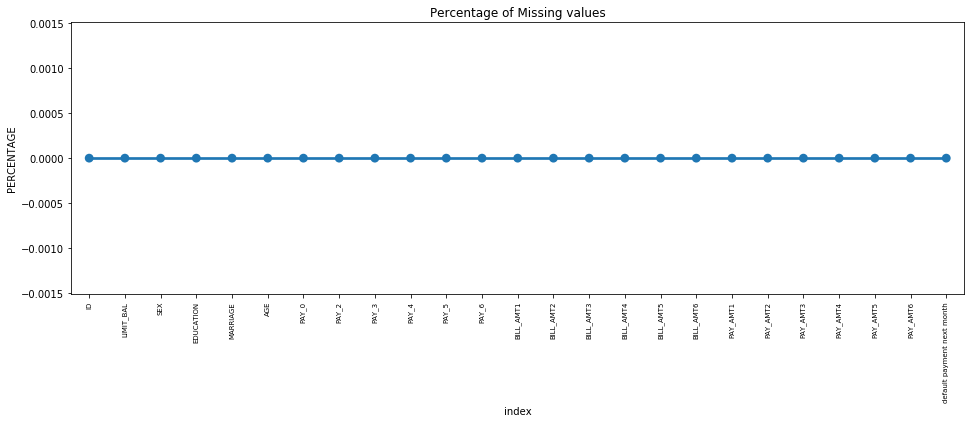

In [13]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [14]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [15]:
#renaming for better convinience
df.rename(columns={'default payment next month' : 'default_payment_next_month'}, inplace=True)

In [16]:
# counts the dependent variable data set
df['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In [17]:
# Get the proportion of customers who had default payment in the next month  
# About 22% customers had default payment next month

df['default_payment_next_month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default_payment_next_month, dtype: float64

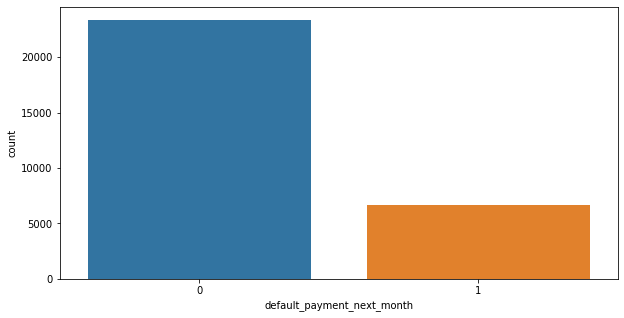

In [18]:
#plotting the count plot to vizualize the data distribution 
#plot the count plot to check the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'default_payment_next_month', data = df)

In [19]:
# Combine 0 and 3 by changing the value 0 into others

df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

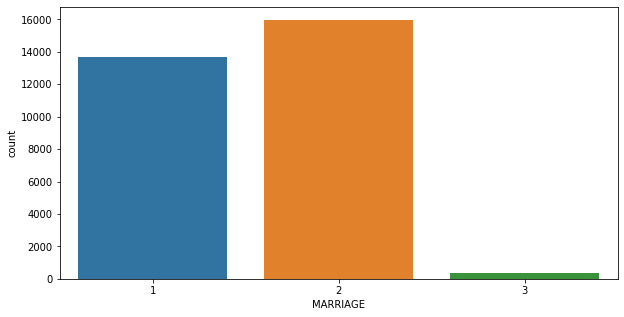

In [20]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', data = df)

In [23]:
#renaming columns 

df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [24]:
#check details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_SEPT                      30000 non-null int64
PAY_AUG                       30000 non-null int64
PAY_JUL                       30000 non-null int64
PAY_JUN                       30000 non-null int64
PAY_MAY                       30000 non-null int64
PAY_APR                       30000 non-null int64
BILL_AMT_SEPT                 30000 non-null int64
BILL_AMT_AUG                  30000 non-null int64
BILL_AMT_JUL                  30000 non-null int64
BILL_AMT_JUN                  30000 non-null int64
BILL_AMT_MAY                  30000 non-null int64
BILL_AMT_APR            

In [25]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


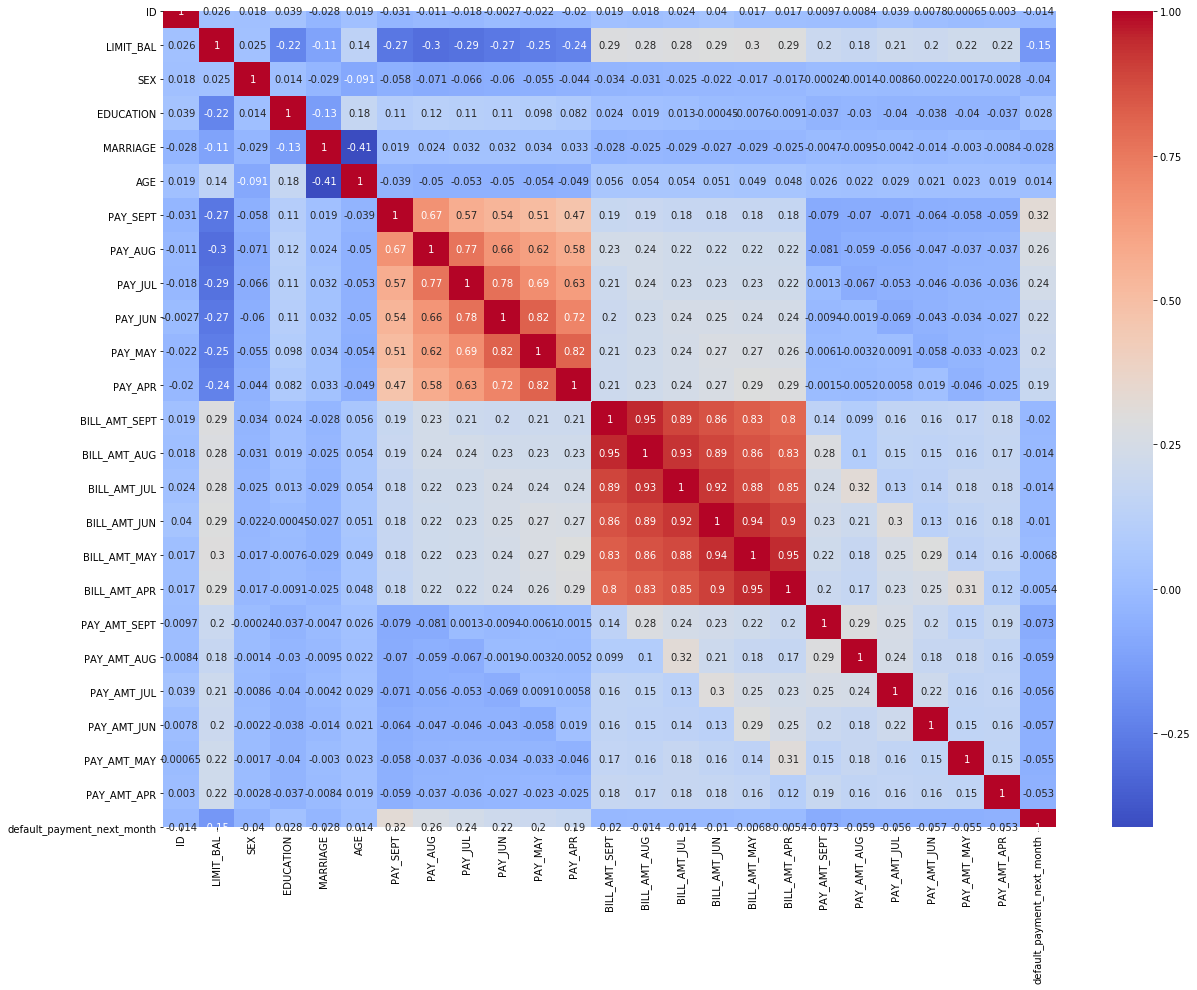

In [26]:
#plotting the heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [27]:
#import the module 
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['default_payment_next_month'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [28]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,8994,66679,1,2,1,41,1,2,1,1,...,51999,26819,15001,16230,1012,374,3986,157,1591,635
46724,6223,20000,1,2,1,25,2,0,0,0,...,19325,18780,19271,19895,1638,2275,638,789,977,1396
46725,5337,120000,2,2,1,30,0,-2,-2,-2,...,0,0,728,131,224,0,0,728,131,1564
46726,14194,197096,1,1,1,37,0,0,0,0,...,6564,3278,6053,35968,4844,6753,2571,5751,19014,4777


In [29]:
columns = list(df.columns)

In [30]:
columns.pop()

'default_payment_next_month'

In [31]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [32]:
balance_df['default_payment_next_month'] = y_smote

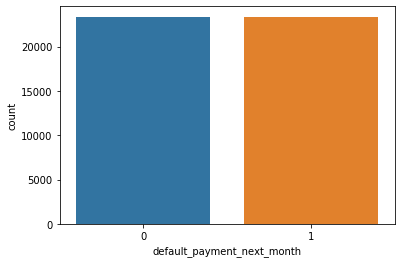

In [33]:
#plot the count plot after smote
sns.countplot('default_payment_next_month', data = balance_df)

In [34]:
balance_df[balance_df['default_payment_next_month']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,8994,66679,1,2,1,41,1,2,1,1,...,26819,15001,16230,1012,374,3986,157,1591,635,1
46724,6223,20000,1,2,1,25,2,0,0,0,...,18780,19271,19895,1638,2275,638,789,977,1396,1
46725,5337,120000,2,2,1,30,0,-2,-2,-2,...,0,728,131,224,0,0,728,131,1564,1
46726,14194,197096,1,1,1,37,0,0,0,0,...,3278,6053,35968,4844,6753,2571,5751,19014,4777,1


In [35]:
#save a copy file in other variable
credit_df_copy = balance_df.copy()

In [36]:
#assign the the sum of payment value in one 
credit_df_copy['total_Payement_Value'] = credit_df_copy['PAY_SEPT'] + credit_df_copy['PAY_AUG'] + credit_df_copy['PAY_JUL'] + credit_df_copy['PAY_JUN'] + credit_df_copy['PAY_MAY'] + credit_df_copy['PAY_APR']

In [37]:
#check the correlation by using mean
credit_df_copy.groupby('default_payment_next_month')['total_Payement_Value'].mean()

default_payment_next_month
0   -1.980140
1    1.658278
Name: total_Payement_Value, dtype: float64

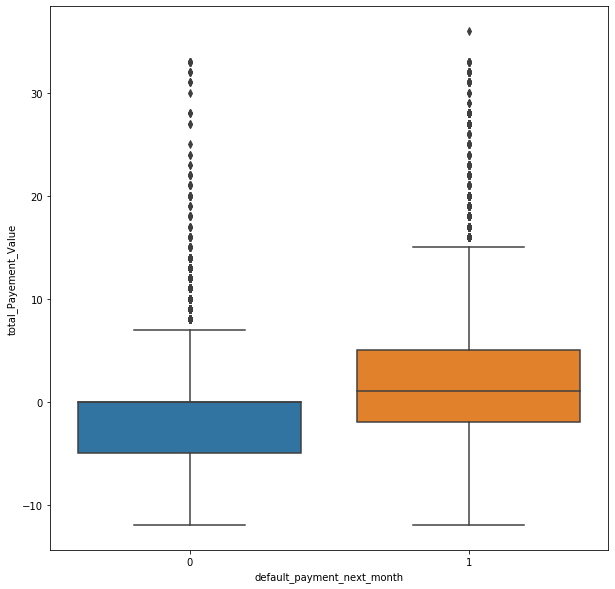

In [38]:
#plotting the box plot 
plt.figure(figsize=(10,10))
sns.boxplot(data = credit_df_copy, x = 'default_payment_next_month', y = 'total_Payement_Value' )

In [39]:
#create a new column due by calculating the sum of total bill ammount substract it from the total amont paid
credit_df_copy['Dues'] = (credit_df_copy['BILL_AMT_APR']+credit_df_copy['BILL_AMT_MAY']+credit_df_copy['BILL_AMT_JUN']+credit_df_copy['BILL_AMT_JUL']+credit_df_copy['BILL_AMT_SEPT'])-(credit_df_copy['PAY_AMT_APR']+credit_df_copy['PAY_AMT_MAY']+credit_df_copy['PAY_AMT_JUN']+credit_df_copy['PAY_AMT_JUL']+credit_df_copy['PAY_AMT_AUG']+credit_df_copy['PAY_AMT_SEPT'])

In [40]:
#check the mean to calculate the correletion 
credit_df_copy.groupby('default_payment_next_month')['Dues'].mean()

default_payment_next_month
0    187742.051532
1    194422.895823
Name: Dues, dtype: float64

In [41]:
credit_df_copy.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'},
                        'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 0 : 'others'},
                        'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [42]:
#final data set
credit_df_copy.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month,total_Payement_Value,Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,3913
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,10352
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,76608
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,174713
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,44620


In [43]:
#get dummies 
credit_df_copy = pd.get_dummies(credit_df_copy,columns=['EDUCATION','MARRIAGE'])

In [44]:
#get dummies
credit_df_copy = pd.get_dummies(credit_df_copy, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [45]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
credit_df_copy = credit_df_copy.replace(encoders_nums)

In [46]:
credit_df_copy.drop('ID',axis = 1, inplace = True)

In [47]:
credit_df_copy.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'default_payment_next_month',
       'total_Payement_Value', 'Dues', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_others', 'EDUCATION_university', 'MARRIAGE_married',
       'MARRIAGE_others', 'MARRIAGE_single', 'PAY_SEPT_-1', 'PAY_SEPT_0',
       'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3', 'PAY_SEPT_4', 'PAY_SEPT_5',
       'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8', 'PAY_AUG_-1', 'PAY_AUG_0',
       'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3', 'PAY_AUG_4', 'PAY_AUG_5',
       'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8', 'PAY_JUL_-1', 'PAY_JUL_0',
       'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3', 'PAY_JUL_4', 'PAY_JUL_5',
       'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8', 'PAY_JUN_-1', 'PAY_JU

In [48]:
credit_df_copy.shape

(46728, 88)

In [49]:
credit_df_copy.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

In [51]:
#make a copy
credit_df_logistic = credit_df_copy.copy()

In [52]:
#show the first 5 column
credit_df_logistic.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0


In [53]:
#define the X and y value
X = credit_df_logistic.drop(['default_payment_next_month','total_Payement_Value','Dues'],axis=1)
y = credit_df_logistic['default_payment_next_month']

In [54]:
columns = X.columns

In [55]:
#standardise the x value by using satandardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [56]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [57]:
#set the parmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [58]:
#fit the parameter 
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    7.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    7.4s finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [59]:
optimized_clf = grid_lr_clf.best_estimator_

In [60]:
grid_lr_clf.best_params_

{'C': 10, 'penalty': 'l2'}

In [61]:
grid_lr_clf.best_score_

0.7499921854668784

In [62]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [63]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [64]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7518446353850576
The accuracy on test data is  0.7539718565592374


In [65]:
#print the accuracy,precission,recall,f1,roc_score 
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7539718565592374
The precision on test data is  0.6905317769130999
The recall on test data is  0.7908496732026143
The f1 on test data is  0.7372940036006093
The roc_score on test data is  0.7581248020748944


In [66]:
# Get the confusion matrix for both train and test
cm_lr = confusion_matrix(y_train, train_class_preds)
print(cm_lr)

[[12792  2861]
 [ 4908 10746]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

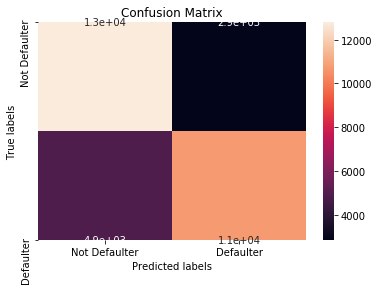

In [67]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cm_lr, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [68]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [69]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

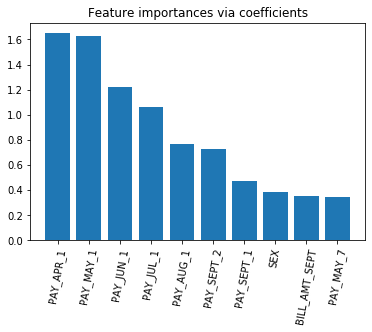

In [70]:
#plot the graph 
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [71]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

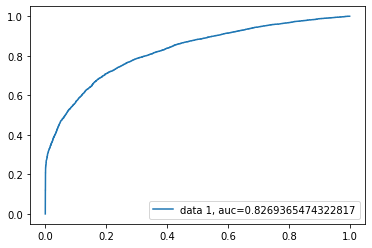

In [72]:
#plot the graph
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [73]:
#import the packages
from sklearn.ensemble import RandomForestClassifier

In [74]:
#define the X and y value
X = credit_df_copy.drop(['default_payment_next_month','total_Payement_Value','Dues'],axis=1)
y = credit_df_copy['default_payment_next_month']

In [75]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [77]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9994889321876896
The accuracy on test data is  0.8321120549899488


In [78]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8321120549899488
The precision on test data is  0.7976653696498055
The recall on test data is  0.8566652737150021
The f1 on test data is  0.8261132379609109
The roc_score on test data is  0.8336954128827377


In [79]:
#set the parmeter
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [80]:
#fit the parameter
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  27 | elapsed:   38.3s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   47.6s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [81]:
grid_rf_clf.best_score_

0.8186668045305804

In [82]:
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 200}

In [83]:
optimal_rf_clf = grid_rf_clf.best_estimator_

In [84]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [85]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9985626217778771
The accuracy on test data is  0.833992607483302


In [86]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.833992607483302
The precision on test data is  0.8005188067444877
The recall on test data is  0.8579371698637753
The f1 on test data is  0.8282340311325819
The roc_score on test data is  0.8354958731292864


In [87]:
# Get the confusion matrix for both train and test
cm_rf = confusion_matrix(y_train, train_class_preds)
print(cm_rf)

[[15633    20]
 [   25 15629]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

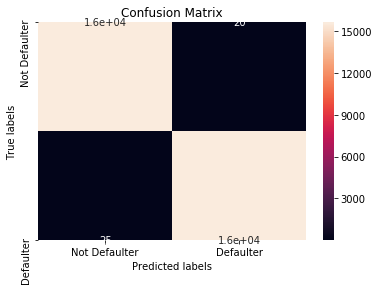

In [88]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [89]:
len(optimal_rf_clf.feature_importances_)

85

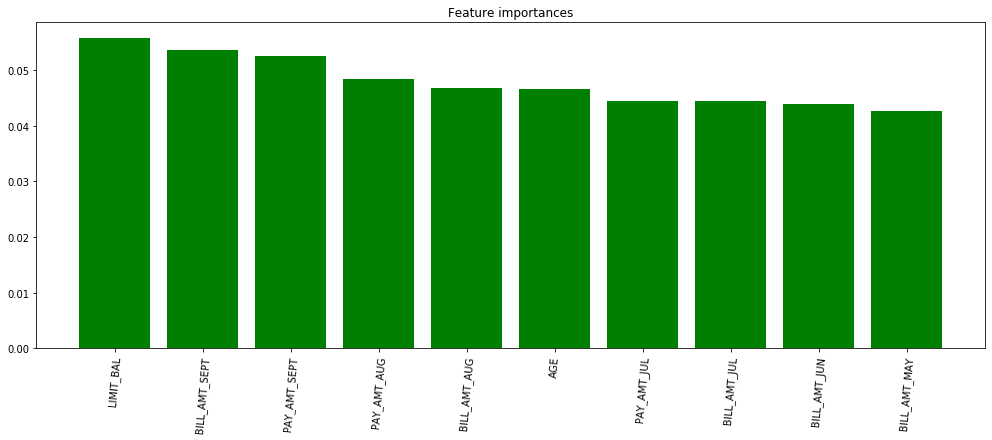

In [90]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [91]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [92]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

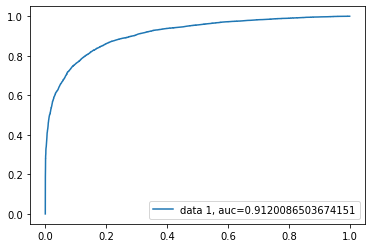

In [93]:
import sklearn.metrics as metrics
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [94]:
credit_df_svc = credit_df_copy.copy()

In [95]:
#import the packages
from sklearn.model_selection import GridSearchCV

In [96]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],   
              'kernel': ['rbf']} 

In [97]:
#define the X and y value
X = credit_df_svc.drop(['default_payment_next_month','total_Payement_Value','Dues'],axis=1)
y = credit_df_svc['default_payment_next_month']

In [98]:
#standardise the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [99]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [100]:
#set the parmeter
#fit the parameter
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed: 10.6min remaining: 53.1min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed: 11.6min remaining:  8.3min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 22.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 22.7min finished


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [101]:
optimal_SVC_clf = grid_clf.best_estimator_

In [102]:
grid_clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [103]:
grid_clf.best_score_

0.7736290453064777

In [104]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [143]:
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.8281564100901369
The precision on test data is  0.7852140077821012
The recall on test data is  0.8589670828603859
The f1 on test data is  0.8204363734923432
The roc_score on test data is  0.830594254436284


[[13605  2048]
 [ 4023 11631]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

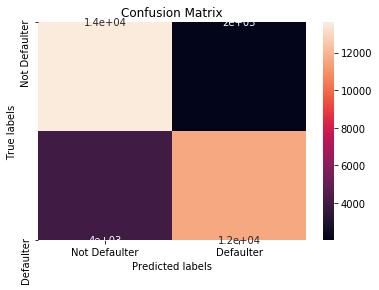

In [106]:
  # Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [107]:
optimal_SVC_clf

SVC(C=10, probability=True)

In [108]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [109]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]

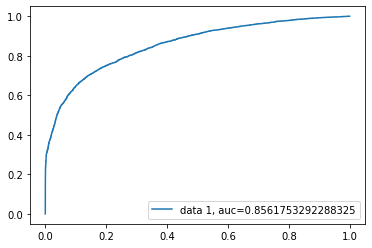

In [110]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [112]:
#import lightgbm and xgboost 

import xgboost as xgb

In [113]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [114]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [115]:
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

[15:25:52] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [116]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(seconds=2, microseconds=198862)

In [117]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 
#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest) 

In [118]:
len(train_class_preds_probs)

31307

In [119]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [120]:
test_class_preds_probs[:20]

array([0.265539  , 0.24397117, 0.41461867, 0.22841996, 0.2536651 ,
       0.27436802, 0.22205466, 0.35480788, 0.60014534, 0.28440368,
       0.66598123, 0.34424055, 0.8239977 , 0.48113948, 0.752736  ,
       0.29837826, 0.6283605 , 0.4341542 , 0.926236  , 0.30855942],
      dtype=float32)

In [121]:
test_class_preds[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [122]:
len(y_train)

31307

In [123]:
len(train_class_preds)

31307

In [124]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.7839141406075318
The accuracy on test data is  0.7751118604500357


In [125]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.7751118604500357
The precision on test data is  0.7029831387808041
The recall on test data is  0.8214610488026675
The f1 on test data is  0.7576181157394464
The roc_score on train data is  0.780956071267479


In [126]:
# Get the confusion matrix for both train and test
cm_xg = confusion_matrix(y_train, train_class_preds)
print(cm_xg)

[[13472  2181]
 [ 4584 11070]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

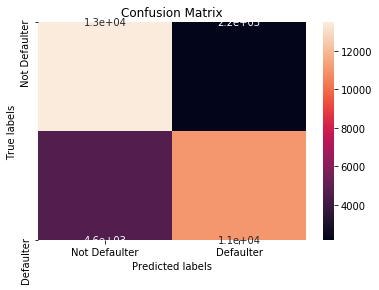

In [127]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cm_xg, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [128]:
#import the packages
from xgboost import  XGBClassifier

In [129]:
#define the X and y value
X = credit_df_copy.drop(['default_payment_next_month','total_Payement_Value','Dues'],axis=1)
y = credit_df_copy['default_payment_next_month']

In [130]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [131]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1,iid=False, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.7min finished


[15:32:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [132]:
gsearch1.best_score_

0.8190820705959964

In [133]:
optimal_xgb = gsearch1.best_estimator_

In [134]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [135]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.9139808988405149
The accuracy on test data is  0.8281564100901369


In [136]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.8281564100901369
The precision on test data is  0.7852140077821012
The recall on test data is  0.8589670828603859
The f1 on test data is  0.8204363734923432
The roc_score on train data is  0.830594254436284


In [137]:
pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

,importance_xgb
PAY_AUG_1,0.180686
PAY_JUL_1,0.098339
PAY_SEPT_2,0.069805
PAY_JUN_1,0.061170
PAY_APR_1,0.043461
PAY_AUG_2,0.042324
PAY_MAY_1,0.040561
SEX,0.032058
PAY_SEPT_1,0.031544
MARRIAGE_married,0.024169


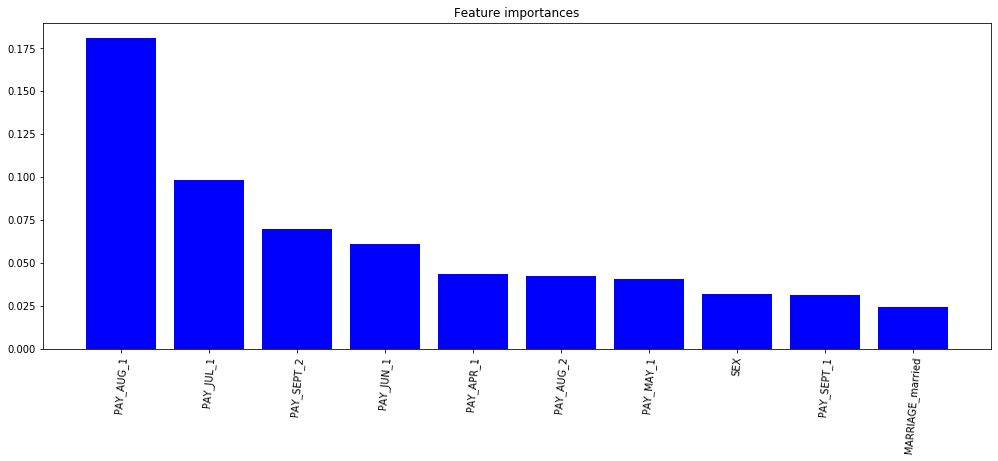

In [138]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_xgb.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [139]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

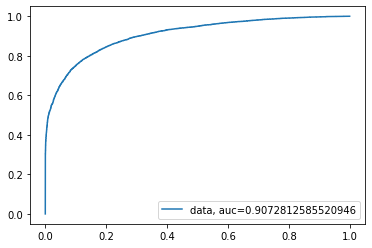

In [140]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [141]:
recall_score

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [145]:
#create a table of all models all score for comparison 
classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr,train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]

In [146]:
classifiers_proba = [(optimized_clf, y_preds_proba_lr), 
               (optimal_rf_clf, y_preds_proba_rf), 
               (optimal_xgb, y_preds_proba_xgb),
               (optimal_SVC_clf,y_pred_proba_SVC)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [147]:
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00012970168612191958, 0.00038910505836...",0.826937
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.03463035019455253, 0.03501945525291829...",0.912009
XGBClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00012970168612191958, 0.00155642023346...",0.907281
SVC,"[0.0, 0.0, 0.0, 0.00012968486577616392, 0.0001...","[0.0, 0.00012970168612191958, 0.14760051880674...",0.856175


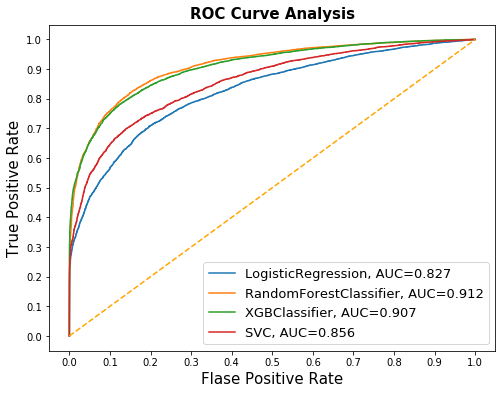

In [148]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [149]:
# Compute precision, recall and threshold of Random Forest

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

recalls_80 = recalls[np.argmin(recalls >= 0.80)]               # Recommend recall score = 0.8
precision_80 = precisions[np.argmin(recalls >= 0.80)]
threshold_80_recall = thresholds[np.argmin(recalls >= 0.80)]

thresholds = np.append(thresholds, 1)

recalls_80, precision_80, threshold_80_recall

(0.7998702983138781, 0.8460694196734806, 0.47563753)

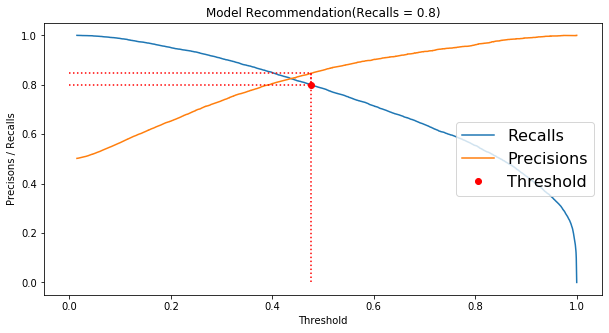

In [150]:
# Plot recommended recall = 0.8

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(thresholds, recalls, label='Recalls')
ax.plot(thresholds, precisions, label='Precisions')

ax.plot([threshold_80_recall, threshold_80_recall], [precision_80, recalls_80], "r:" )
ax.plot([threshold_80_recall, threshold_80_recall], [0, precision_80], "r:")
ax.plot([0, threshold_80_recall], [precision_80, precision_80], "r:")
ax.plot([0, threshold_80_recall], [recalls_80, recalls_80], "r:")
ax.plot([threshold_80_recall], [recalls_80], "ro", label='Threshold')

ax.set_xlabel('Threshold')
ax.set_ylabel('Precisons / Recalls')
ax.legend(loc='center right',fontsize=16)
plt.title('Model Recommendation(Recalls = 0.8)')
plt.savefig('recommended_recall')
plt.show()

Text(0.5, 1.0, 'Features importance')

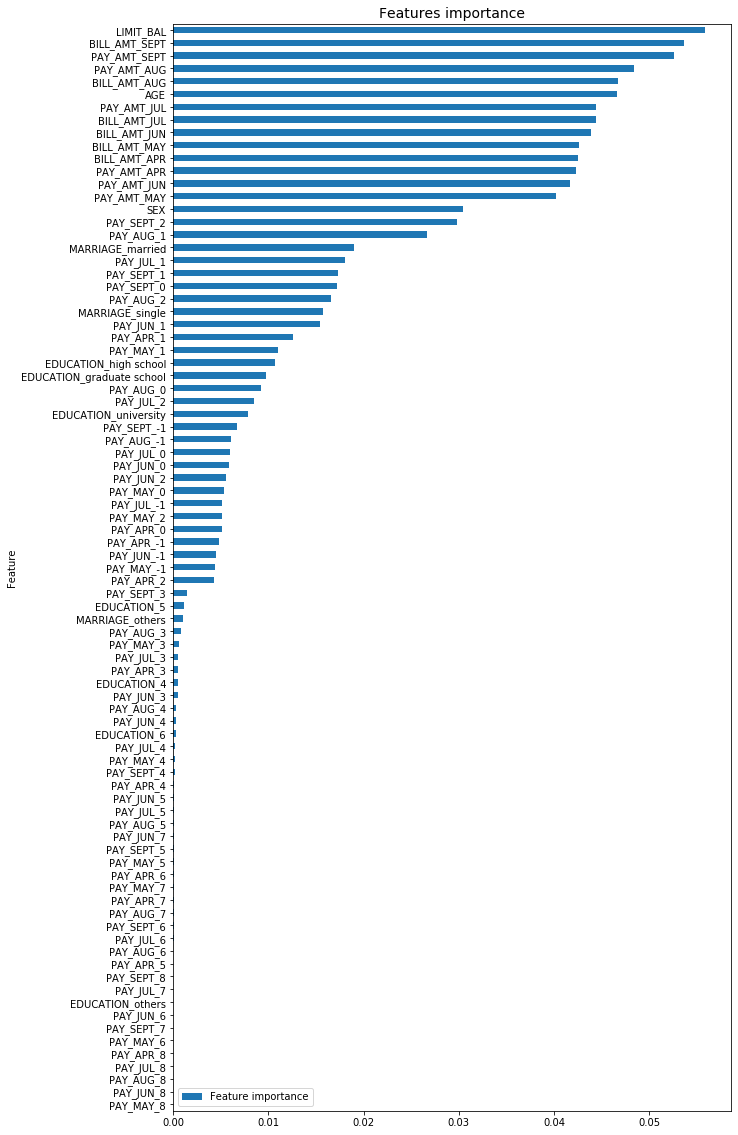

In [151]:
fea_df = pd.DataFrame({'Feature': columns, 'Feature importance': optimal_rf_clf.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,20))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)